# Basic Intro to Machine Learning - Classification
Using the The Ames Housing dataset compiled by Dean De Cock.

In this notebook, we will look at how to apply classification.

In [1]:
# Import necessary packages

# Pandas to handle the data
import pandas as pd

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style = 'darkgrid')
sns.set_context('notebook')

# Scipy for linear regression
import scipy

# SciKit-Learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Import Data

In [2]:
included_columns = ['SalePrice','LotArea','BldgType','HouseStyle',
                    'OverallCond','YearBuilt','RoofMatl','GrLivArea',
                    'Fireplaces','GarageArea','PoolArea','MiscVal']

data = pd.read_csv('data/housing_data.csv', usecols = included_columns)

In [3]:
data

,LotArea,BldgType,HouseStyle,OverallCond,YearBuilt,RoofMatl,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice
0,8450,1Fam,2Story,5,2003,CompShg,1710,0,548,0,0,208500
1,9600,1Fam,1Story,8,1976,CompShg,1262,1,460,0,0,181500
2,11250,1Fam,2Story,5,2001,CompShg,1786,1,608,0,0,223500
3,9550,1Fam,2Story,5,1915,CompShg,1717,1,642,0,0,140000
4,14260,1Fam,2Story,5,2000,CompShg,2198,1,836,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1Fam,2Story,5,1999,CompShg,1647,1,460,0,0,175000
1456,13175,1Fam,1Story,6,1978,CompShg,2073,2,500,0,0,210000
1457,9042,1Fam,2Story,9,1941,CompShg,2340,2,252,0,2500,266500
1458,9717,1Fam,1Story,6,1950,CompShg,1078,0,240,0,0,142125


## Quick EDA

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.0,1.0,1.00,3.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.00,738.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0


## Data Engineering

* Define which homes are expensive
* One-hot encode categorical data
* We do not need to scale data since we will be using a Decision Tree classifier

### Define 'Expensive' and 'Not Expensive' homes
We will classify homes as 'expensive' (1) and 'not expensive' (0) for the purpose of classification.

In [5]:
data['SalePrice'] = data['SalePrice'].apply(lambda x: 0 if x < 163000 else 1)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.5,1464.0,1776.75,5642.0
Fireplaces,1460.0,0.613014,0.644666,0.0,0.0,1.0,1.00,3.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
PoolArea,1460.0,2.758904,40.177307,0.0,0.0,0.0,0.00,738.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0
SalePrice,1460.0,0.501370,0.500169,0.0,0.0,1.0,1.00,1.0


### One-hot encode categorical data

In [7]:
categorical_variables = ['BldgType', 'HouseStyle','RoofMatl']

data = pd.get_dummies(data = data, columns = categorical_variables)

data

,LotArea,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,BldgType_1Fam,...,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,8450,5,2003,1710,0,548,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,9600,8,1976,1262,1,460,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,11250,5,2001,1786,1,608,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,9550,5,1915,1717,1,642,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,14260,5,2000,2198,1,836,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,5,1999,1647,1,460,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1456,13175,6,1978,2073,2,500,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1457,9042,9,1941,2340,2,252,0,2500,1,1,...,0,0,0,1,0,0,0,0,0,0
1458,9717,6,1950,1078,0,240,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Modelling

### Splitting the data

In [8]:
X = data.drop(columns= ['SalePrice'])
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree

In [9]:
classifier_dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
classifier_dt.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

## Model performance

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_dt = classifier_dt.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))

print('Classification Report:')
print(classification_report(y_test, y_pred_dt, target_names=['0','1']))

Confusion Matrix:
[[186  47]
 [ 11 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       233
           1       0.80      0.95      0.87       205

    accuracy                           0.87       438
   macro avg       0.87      0.87      0.87       438
weighted avg       0.88      0.87      0.87       438



### Visualize decision tree

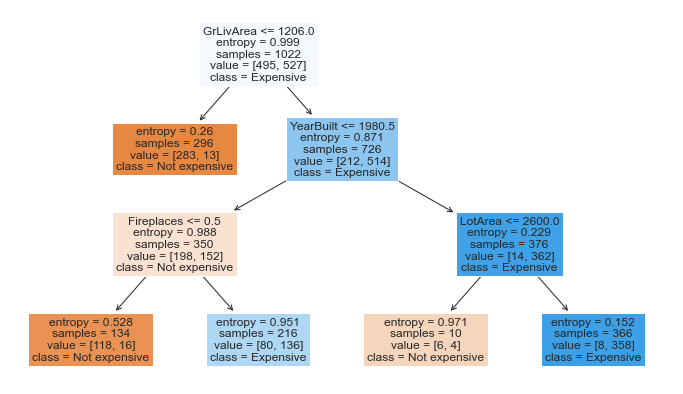

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = data.columns
class_names = ['Not expensive','Expensive']

plt.figure(figsize=(12, 7));
tree.plot_tree(classifier_dt, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

## Hyperparameter tuning

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

classifier_dt_tuned = DecisionTreeClassifier(random_state=42)

params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "class_weight": ['balanced', None], 
          "max_depth": randint(2, 21),
          "min_samples_leaf": randint(1, 11),
          "max_features": uniform(0.0, 1.0)}

search = RandomizedSearchCV(classifier_dt_tuned, param_distributions=params, n_iter=1000, scoring='f1_macro', cv=10, verbose=2)
search = search.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=0.3371236608219109, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END class_weight=balan

In [13]:
search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 0.706440278404076,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [14]:
y_pred_dt_tuned = search.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt_tuned))

print('Classification Report:')
print(classification_report(y_test, y_pred_dt_tuned, target_names=['0','1']))

Confusion Matrix:
[[199  34]
 [ 20 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       233
           1       0.84      0.90      0.87       205

    accuracy                           0.88       438
   macro avg       0.88      0.88      0.88       438
weighted avg       0.88      0.88      0.88       438



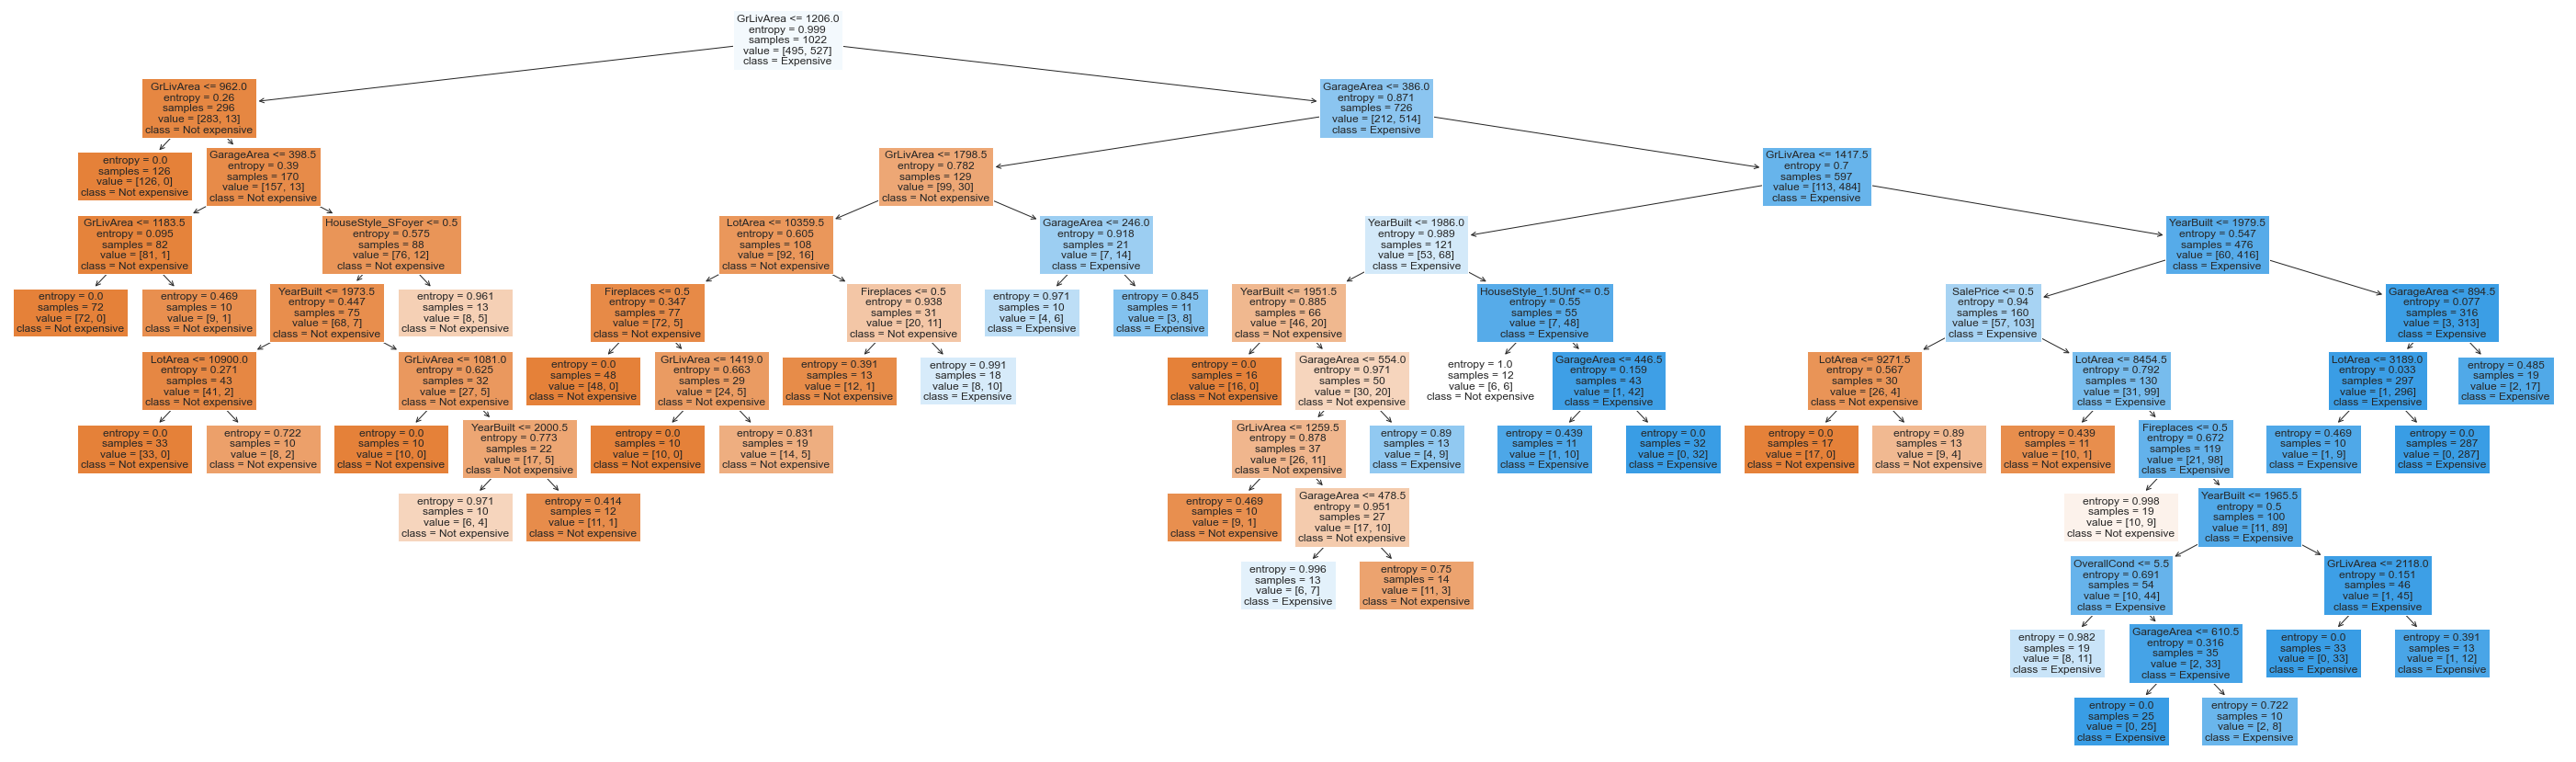

In [15]:
plt.figure(figsize=(50, 15));
tree.plot_tree(search.best_estimator_, filled=True, feature_names=feature_names, class_names=class_names, proportion=False, fontsize=12);

## What about a 🤯🎉 ~~ NeUrA1 N3tW0rK ~~ 🎉😲
To use a Neural Network, we will need to scale our input values so that they are in the range [ 0 , 1 ]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[data_scaled.columns] = scaler.fit_transform(data_scaled[data_scaled.columns])
data_scaled

,LotArea,OverallCond,YearBuilt,GrLivArea,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,BldgType_1Fam,...,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,0.033420,0.500,0.949275,0.259231,0.000000,0.386460,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038795,0.875,0.753623,0.174830,0.333333,0.324401,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046507,0.500,0.934783,0.273549,0.333333,0.428773,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038561,0.500,0.311594,0.260550,0.333333,0.452750,0.0,0.00000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.060576,0.500,0.927536,0.351168,0.333333,0.589563,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.500,0.920290,0.247362,0.333333,0.324401,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.055505,0.625,0.768116,0.327619,0.666667,0.352609,0.0,0.00000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.036187,1.000,0.500000,0.377920,0.666667,0.177715,0.0,0.16129,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.039342,0.625,0.565217,0.140166,0.000000,0.169252,0.0,0.00000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = data_scaled.drop(columns= ['SalePrice'])
y = data_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.neural_network import MLPClassifier

classifier_nn = MLPClassifier(solver='adam', activation='relu', alpha=1e-3, max_iter=1500,
                       hidden_layer_sizes=(10, 10), random_state=1, verbose=1)
classifier_nn.fit(X_train, y_train)

Iteration 1, loss = 0.77124194
Iteration 2, loss = 0.75472670
Iteration 3, loss = 0.73899343
Iteration 4, loss = 0.72469930
Iteration 5, loss = 0.71305098
Iteration 6, loss = 0.70284677
Iteration 7, loss = 0.69467527
Iteration 8, loss = 0.68844706
Iteration 9, loss = 0.68311041
Iteration 10, loss = 0.67802429
Iteration 11, loss = 0.67369089
Iteration 12, loss = 0.66966821
Iteration 13, loss = 0.66644097
Iteration 14, loss = 0.66343772
Iteration 15, loss = 0.66054656
Iteration 16, loss = 0.65745729
Iteration 17, loss = 0.65449882
Iteration 18, loss = 0.65136127
Iteration 19, loss = 0.64813745
Iteration 20, loss = 0.64462646
Iteration 21, loss = 0.64082886
Iteration 22, loss = 0.63700136
Iteration 23, loss = 0.63286609
Iteration 24, loss = 0.62892917
Iteration 25, loss = 0.62489159
Iteration 26, loss = 0.62031975
Iteration 27, loss = 0.61622369
Iteration 28, loss = 0.61144610
Iteration 29, loss = 0.60582085
Iteration 30, loss = 0.60010070
Iteration 31, loss = 0.59387314
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 10), max_iter=1500,
              random_state=1, verbose=1)

In [19]:
y_pred_nn = classifier_nn.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nn))

print('Classification Report:')
print(classification_report(y_test, y_pred_nn, target_names=['0','1']))

Confusion Matrix:
[[212  21]
 [ 15 190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       233
           1       0.90      0.93      0.91       205

    accuracy                           0.92       438
   macro avg       0.92      0.92      0.92       438
weighted avg       0.92      0.92      0.92       438

